In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
import plotly.graph_objects as go
from matplotlib.figure import projections

In [61]:
# Load and Prepare Dataset
data = load_diabetes()
X = data.data
y = data.target
y = np.expand_dims(y, 1)
data = np.append(X, y, 1)
total_sample = len(data)
print(data.shape)

(442, 11)


In [62]:
# Labels to the features of the dataset
def get_features_and_labels(data):
  features = data[:, :-1]
  labels = data[:,-1].reshape([-1,1])
  return features,labels

In [63]:
# Data Preprocessing
def create_data(data, train_p=0.6, dev_p=0.20):
  np.random.shuffle(data)

  total_sample=len(data)
  train = data[:int(total_sample*train_p)]
  dev = data[int(total_sample*train_p):int(total_sample*(train_p+dev_p))]
  test = data[int(total_sample*(train_p+dev_p)):]

  train_x,train_y = get_features_and_labels(train)
  dev_x,dev_y = get_features_and_labels(dev)
  test_x, test_y = get_features_and_labels(test)

  return train_x, train_y, dev_x, dev_y, test_x, test_y

<ipython-input-64-3b8f7fd312b9>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


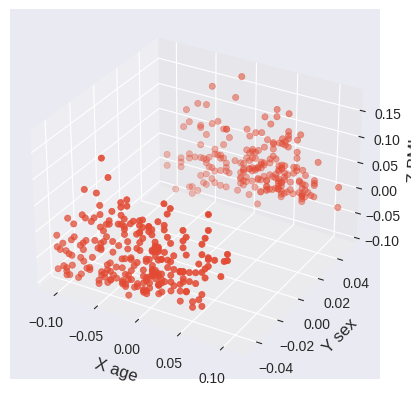

In [64]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(data[:,0],data[:,1],data[:,2],marker='o')
ax.set_xlabel('X age')
ax.set_ylabel('Y sex')
ax.set_zlabel('Z BMI')
plt.style.use('seaborn-darkgrid')
plt.show()

In [65]:
train_x,train_y,dev_x,dev_y,test_x,test_y = create_data(data,train_p=0.6,dev_p=0.20)
X= train_x[:,0:2]
Y= train_y[:5]
m=len(Y)
print(X[:5])
print(Y)

[[-0.05273755  0.05068012]
 [-0.04547248 -0.04464164]
 [ 0.06713621  0.05068012]
 [ 0.01264814 -0.04464164]
 [ 0.04534098 -0.04464164]]
[[ 42.]
 [ 57.]
 [283.]
 [ 50.]
 [214.]]


In [66]:
def feature_normalize(X):
  max=np.max(X,axis=0)
  min=np.min(X,axis=0)
  X_norm=(X-min)/(max-min)
  return X_norm,min,max

In [67]:
X,min,max=feature_normalize(X)
print('min=',min)
print('max=',max)
print('X_norm',X[:5])

min= [-0.10722563 -0.04464164]
max= [0.11072668 0.05068012]
X_norm [[0.25       1.        ]
 [0.28333333 0.        ]
 [0.8        1.        ]
 [0.55       0.        ]
 [0.7        0.        ]]


In [68]:
train_x,min,max=feature_normalize(train_x)
dev_x,min,max=feature_normalize(dev_x)
test_x,min,max=feature_normalize(test_x)

In [69]:
train_x=np.hstack((np.ones((len(train_y),1)),train_x))
dev_x=np.hstack((np.ones((len(dev_y),1)),dev_x))
test_x=np.hstack((np.ones((len(test_y),1)),test_x))

In [70]:
def compute_cost(X,Y,theta):
  pred=X.dot(theta)
  errors=np.subtract(pred,Y)
  sqrErrors=np.square(errors)
  j=1/(2*m)*np.sum(sqrErrors)
  return j

In [71]:
def gradient_descent(X,Y,theta,learning_rate,iterations):
  cost=np.zeros(iterations)
  for i in range(iterations):
    pred=X.dot(theta)
    errors=np.subtract(pred,Y)
    sum_delta=(learning_rate/m)*X.transpose().dot(errors)
    theta=theta-sum_delta
    cost[i]=compute_cost(X,Y,theta)
  return theta, cost

In [72]:
theta= np.zeros((11,1))
iterations = 1000;
learning_rate = 0.01;
theta, cost = gradient_descent(train_x, train_y,theta,learning_rate,iterations)
print("theta", theta[:5])
print("cost",cost[:5])

theta [[ 39.74075432]
 [-29.40220559]
 [-20.67046889]
 [144.81999206]
 [ 63.05144631]]
cost [311571.96166799 176821.35297128 137016.84568024 123869.13594961
 118342.7487852 ]


Text(0.5, 1.0, 'convergence of gradient descent')

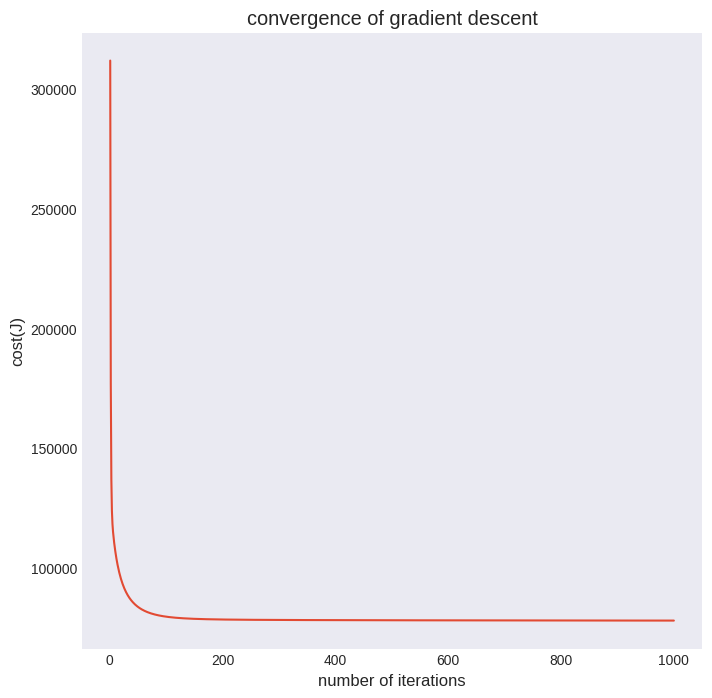

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(range(1,iterations+1),cost)
plt.grid()
plt.xlabel("number of iterations")
plt.ylabel("cost(J)")
plt.title("convergence of gradient descent")

In [74]:
iterations=1000;
theta=np.zeros((11,1))
X=train_x
Y=train_y

theta1: [[46.73427788]
 [18.36747163]
 [ 1.55320489]
 [44.30679852]
 [37.46576274]] cost1: [766730.16080795 747514.4632804  728880.03600017 710809.25844111
 693285.04426702]
theta2: [[ 38.47397409]
 [-21.58370567]
 [-21.61142753]
 [123.266452  ]
 [ 66.8067065 ]] cost2: [602089.73154198 469562.41550227 374312.39853404 305822.70257328
 256543.85855947]
theta3: [[ 39.74075432]
 [-29.40220559]
 [-20.67046889]
 [144.81999206]
 [ 63.05144631]] cost2: [311571.96166799 176821.35297128 137016.84568024 123869.13594961
 118342.7487852 ]


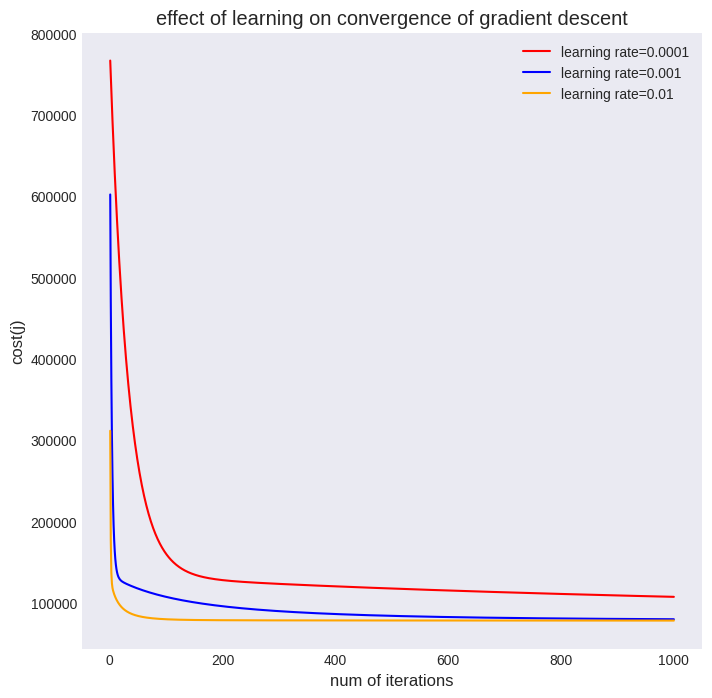

In [78]:
plt.figure(figsize=(8,8))
learning_rate=0.0001;
theta1,cost1=gradient_descent(X,Y,theta,learning_rate,iterations)
print("theta1:",theta1[:5],"cost1:",cost1[:5])
plt.plot(range(1,iterations+1),cost1,color='red',label='learning rate=0.0001')

learning_rate=0.001;
theta2,cost2=gradient_descent(X,Y,theta,learning_rate,iterations)
print("theta2:",theta2[:5],"cost2:",cost2[:5])
plt.plot(range(1,iterations+1),cost2,color='blue',label='learning rate=0.001')

learning_rate=0.01;
theta3,cost3=gradient_descent(X,Y,theta,learning_rate,iterations)
print("theta3:",theta3[:5],"cost2:",cost3[:5])
plt.plot(range(1,iterations+1),cost3,color='orange',label='learning rate=0.01')

plt.grid()
plt.xlabel("num of iterations")
plt.ylabel("cost(j)")
plt.title("effect of learning on convergence of gradient descent")
plt.legend()

original price: [[181.]
 [186.]
 [120.]
 [ 72.]
 [189.]
 [ 94.]
 [263.]
 [200.]
 [268.]
 [173.]
 [ 72.]
 [179.]
 [ 66.]
 [178.]
 [ 77.]
 [261.]
 [214.]
 [ 83.]
 [258.]
 [281.]
 [129.]
 [ 87.]
 [181.]
 [ 74.]
 [ 65.]
 [107.]
 [148.]
 [206.]
 [248.]
 [246.]
 [ 96.]
 [139.]
 [153.]
 [110.]
 [ 40.]
 [200.]
 [190.]
 [ 39.]
 [259.]
 [ 49.]
 [139.]
 [102.]
 [ 72.]
 [ 71.]
 [137.]
 [192.]
 [164.]
 [ 31.]
 [196.]
 [124.]
 [ 75.]
 [ 53.]
 [281.]
 [127.]
 [265.]
 [321.]
 [144.]
 [265.]
 [ 52.]
 [ 66.]
 [109.]
 [141.]
 [ 69.]
 [132.]
 [113.]
 [230.]
 [144.]
 [135.]
 [236.]
 [131.]
 [121.]
 [191.]
 [132.]
 [ 68.]
 [131.]
 [129.]
 [220.]
 [ 90.]
 [ 88.]
 [216.]
 [262.]
 [274.]
 [ 59.]
 [ 61.]
 [142.]
 [118.]
 [100.]
 [ 99.]]
predicted price: [[ 80.56596525]
 [221.49133973]
 [175.65431934]
 [103.68084336]
 [200.50956104]
 [101.30271726]
 [179.83616078]
 [105.24917884]
 [256.80146358]
 [237.68266435]
 [ 42.40736702]
 [180.74712599]
 [105.01277275]
 [111.48856438]
 [ 81.9690484 ]
 [233.39491862]
 [136.

<ipython-input-76-916f3c462622>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


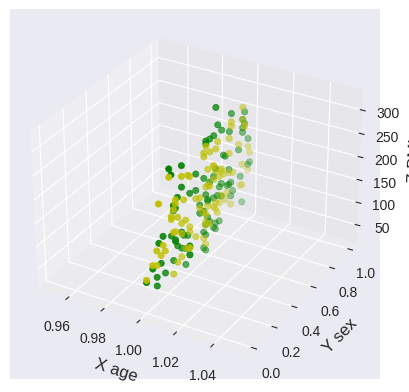

In [76]:
pred_price=dev_x.dot(theta2)
print('original price:',dev_y)
print('predicted price:',pred_price)
cost_dev=compute_cost(dev_x,dev_y,theta2)
print('cost dev=',cost_dev)

fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(dev_x[:,0],dev_x[:,1],dev_y,marker='o',color='g')
ax.scatter(dev_x[:,0],dev_x[:,1],pred_price,marker='o',color='y')
ax.set_xlabel('X age')
ax.set_ylabel('Y sex')
ax.set_zlabel('Z BMI')
plt.style.use('seaborn-darkgrid')
plt.show()

original price: [[311.]
 [ 77.]
 [151.]
 [150.]
 [125.]
 [143.]
 [252.]
 [ 59.]
 [ 39.]
 [118.]
 [140.]
 [206.]
 [ 93.]
 [258.]
 [ 64.]
 [127.]
 [296.]
 [ 65.]
 [220.]
 [ 63.]
 [ 71.]
 [ 96.]
 [243.]
 [170.]
 [184.]
 [128.]
 [113.]
 [197.]
 [201.]
 [202.]
 [182.]
 [ 95.]
 [237.]
 [237.]
 [202.]
 [155.]
 [253.]
 [268.]
 [135.]
 [277.]
 [ 72.]
 [167.]
 [197.]
 [ 84.]
 [ 84.]
 [ 91.]
 [232.]
 [ 52.]
 [104.]
 [ 99.]
 [272.]
 [275.]
 [ 61.]
 [107.]
 [248.]
 [142.]
 [178.]
 [108.]
 [ 92.]
 [198.]
 [170.]
 [158.]
 [199.]
 [ 72.]
 [177.]
 [263.]
 [280.]
 [235.]
 [122.]
 [249.]
 [ 53.]
 [ 97.]
 [141.]
 [151.]
 [160.]
 [103.]
 [ 84.]
 [ 68.]
 [172.]
 [ 69.]
 [ 97.]
 [341.]
 [210.]
 [ 91.]
 [ 58.]
 [138.]
 [109.]
 [128.]
 [162.]]
predicted price: [[179.77215946]
 [ 69.65259222]
 [202.77443589]
 [214.43163434]
 [ 86.01647052]
 [179.71269091]
 [143.30471558]
 [146.53247745]
 [ 61.71952363]
 [ 94.83079397]
 [120.01862803]
 [177.37630822]
 [138.81507261]
 [271.25400645]
 [ 86.10869802]
 [159.4607524 

<ipython-input-79-6ffcbfba9b10>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


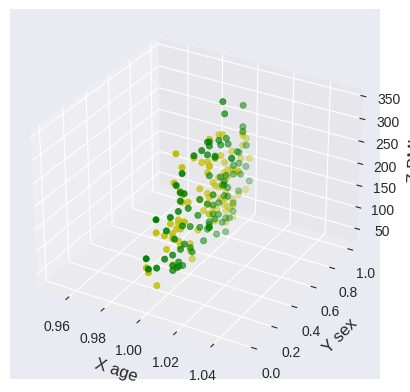

In [79]:
pred_price=test_x.dot(theta2)
print('original price:',test_y)
print('predicted price:',pred_price)
cost_test=compute_cost(test_x,test_y,theta2)
print('cost test=',cost_test)

fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(test_x[:,0],test_x[:,1],test_y,marker='o',color='g')
ax.scatter(test_x[:,0],test_x[:,1],pred_price,marker='o',color='y')
ax.set_xlabel('X age')
ax.set_ylabel('Y sex')
ax.set_zlabel('Z BMI')
plt.style.use('seaborn-darkgrid')
plt.show()
